# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: Nir Hemed 207949090

# Details Student 2: Aviv Levi 319123287


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
/opt/homebrew/opt/python@3.11/bin/python3.11: No module named -m


In [3]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [4]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

/Users/alevi/Documents/assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [145]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [6]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [146]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

The function format_data removes whitespaces and digits from the text

In [8]:
def format_data(text):
    if isinstance(text, str):
        text = ' '.join(text.split())  # Remove extra whitespace
        text = re.sub(r'\d', '', text)  # Remove digits
        return text.strip()
    return text

The tokenizer funtion get as input the stories text and return list of tokens

In [9]:
def tokenizer(stories):
    token_list = []
    for token_info in ht.tokenize(stories):
        # Assuming token_info contains more than two values
        token_type = token_info[0]  # Extract the token type
        token_value = token_info[1]  # Extract the token value
        
        if token_type == 'HEBREW':
            token_list.append(token_value)
    return token_list

First try - We try 4 models that we learn in class , we invesvistage wich model predict in most acurate way , for the first time we use two default vectors without any additional parameters 

In [21]:
def simple_prediction(models_list, X_train, y_train):
    for model_title, model in models_list.items():
        print(f"Model: {model_title}")
        vectorizers = [
            ('Count', CountVectorizer(tokenizer=tokenizer)),
            ('TF-IDF', TfidfVectorizer(tokenizer=tokenizer))
        ]
        for vector_title, vectorizer in vectorizers:
            # Create a pipeline with preprocessing and the model
            pipeline = Pipeline(steps=[
                ('model', model)
            ])
            
            # If using GNB model, convert to dense array
            if model_title == 'GNB':
                X_features = vectorizer.fit_transform(X_train).toarray()
            else:
                X_features = vectorizer.fit_transform(X_train)
                
            pipeline.fit(X_features, y_train)
            mean_score = cross_val_score(pipeline, X_features, y_train, cv=10, scoring='f1_macro').mean()
            
            print(f"Vectorizer: {vector_title}")
            print("Mean F1-macro Score:", mean_score)
        print("-------------")

Before we call the function we formatting the data with format_data function above , In addition we convert gender coulmn to numeric (0-female,1-male)

In [22]:
model_list = {
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': MultinomialNB(),
    'GNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
}
df_train.gender.replace({'f':0,'m':1},inplace=True)
x_train = df_train['story'].apply(format_data)
y_train = df_train['gender']
simple_prediction(model_list,x_train,y_train)


Model: KNN
Vectorizer: Count
Mean F1-macro Score: 0.5028407112441531
Vectorizer: TF-IDF
Mean F1-macro Score: 0.6065601586747527
-------------
Model: NaiveBayes
Vectorizer: Count
Mean F1-macro Score: 0.5179845499133691
Vectorizer: TF-IDF
Mean F1-macro Score: 0.4329778822905296
-------------
Model: GNB
Vectorizer: Count
Mean F1-macro Score: 0.4766428123251635
Vectorizer: TF-IDF
Mean F1-macro Score: 0.48266517284933197
-------------
Model: DecisionTree
Vectorizer: Count
Mean F1-macro Score: 0.5854186956602772
Vectorizer: TF-IDF
Mean F1-macro Score: 0.5786410655216964
-------------


Second try - perform scaling on story feature

In [25]:
def prediction_after_scale(models_list, X_train, y_train):
    for model_title, model in models_list.items():
        print(f"Model: {model_title}")
        vectorizers = [
            ('Count', CountVectorizer(tokenizer=tokenizer)),
            ('TF-IDF', TfidfVectorizer(tokenizer=tokenizer))
        ]
        for vector_title, vectorizer in vectorizers:
            # Create a pipeline with preprocessing and the model
            pipeline = Pipeline(steps=[
                ('scaler', StandardScaler(with_mean=False)),
                ('model', model)
            ])
            
            # If using GNB model, convert to dense array
            if model_title == 'GNB':
                X_features = vectorizer.fit_transform(X_train).toarray()
            else:
                X_features = vectorizer.fit_transform(X_train)
                
            pipeline.fit(X_features, y_train)
            mean_score = cross_val_score(pipeline, X_features, y_train, cv=10, scoring='f1_macro').mean()
            
            print(f"Vectorizer: {vector_title}")
            print("Mean F1-macro Score:", mean_score)
        print("-------------")





In [26]:
model_list = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': MultinomialNB(),
    'GNB': GaussianNB(),
}
df_train.gender.replace({'f':0,'m':1},inplace=True)
x_train = df_train['story'].apply(format_data)
y_train = df_train['gender']
prediction_after_scale(model_list,x_train,y_train)

Model: KNN
Vectorizer: Count
Mean F1-macro Score: 0.4329778822905296
Vectorizer: TF-IDF
Mean F1-macro Score: 0.4381442331527182
-------------
Model: DecisionTree
Vectorizer: Count
Mean F1-macro Score: 0.5920913356363782
Vectorizer: TF-IDF
Mean F1-macro Score: 0.6085222419133326
-------------
Model: NaiveBayes
Vectorizer: Count
Mean F1-macro Score: 0.5552015572623695
Vectorizer: TF-IDF
Mean F1-macro Score: 0.5223275073515532
-------------
Model: GNB
Vectorizer: Count
Mean F1-macro Score: 0.47285243220926365
Vectorizer: TF-IDF
Mean F1-macro Score: 0.47788226402278966
-------------


Third try - Normalize the data

In [27]:
def prediction_after_normalize(models_list, X_train, y_train):
    for model_title, model in models_list.items():
        print(f"Model: {model_title}")
        vectorizers = [
            ('Count', CountVectorizer(tokenizer=tokenizer)),
            ('TF-IDF', TfidfVectorizer(tokenizer=tokenizer))
        ]
        for vector_title, vectorizer in vectorizers:
            # Create a pipeline with preprocessing and the model
            pipeline = Pipeline(steps=[
                ('scaler', StandardScaler(with_mean=False)),
                ('normalizer', preprocessing.Normalizer(norm='l2')),
                ('model', model)
            ])
            
            # If using GNB model, convert to dense array
            if model_title == 'GNB':
                X_features = vectorizer.fit_transform(X_train).toarray()
            else:
                X_features = vectorizer.fit_transform(X_train)
                
            pipeline.fit(X_features, y_train)
            mean_score = cross_val_score(pipeline, X_features, y_train, cv=10, scoring='f1_macro').mean()
            
            print(f"Vectorizer: {vector_title}")
            print("Mean F1-macro Score:", mean_score)
        print("-------------")





In [28]:
model_list = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': MultinomialNB(),
    'GNB': GaussianNB(),
}
df_train.gender.replace({'f':0,'m':1},inplace=True)
x_train = df_train['story'].apply(format_data)
y_train = df_train['gender']
prediction_after_normalize(model_list,x_train,y_train)

Model: KNN
Vectorizer: Count
Mean F1-macro Score: 0.5260959910681892
Vectorizer: TF-IDF
Mean F1-macro Score: 0.5253810132739589
-------------
Model: DecisionTree
Vectorizer: Count
Mean F1-macro Score: 0.6258099241797924
Vectorizer: TF-IDF
Mean F1-macro Score: 0.599234179410076
-------------
Model: NaiveBayes
Vectorizer: Count
Mean F1-macro Score: 0.4329778822905296
Vectorizer: TF-IDF
Mean F1-macro Score: 0.4329778822905296
-------------
Model: GNB
Vectorizer: Count
Mean F1-macro Score: 0.47285243220926365
Vectorizer: TF-IDF
Mean F1-macro Score: 0.47788226402278966
-------------


Final - now we want to find the best hyper hyperparameters with GridSearch in addition to scaling and normalization .

In [111]:
def prediction_gridsearch(models_list, X_train, y_train):
    for model_title, model in models_list.items():
        print(f"Model: {model_title}")
        vectorizers = [
            ('Count', CountVectorizer(tokenizer=tokenizer)),
            ('TF-IDF', TfidfVectorizer(tokenizer=tokenizer))
        ]
        for vector_title, vectorizer in vectorizers:
            # Create a pipeline with preprocessing and the model
            pipeline = Pipeline(steps=[
                ('scaler', StandardScaler(with_mean=False)),
                ('normalizer', preprocessing.Normalizer(norm='l2')),
                ('model', model)
            ])
            # If using GNB model, convert to dense array
            if model_title == 'GNB':
                X_features = vectorizer.fit_transform(X_train).toarray()
            else:
                X_features = vectorizer.fit_transform(X_train)
            
            # Define hyperparameter grid for GridSearch for each model
            param_grid = {}
            if model_title == 'KNN':
                param_grid = {"model__n_neighbors": [3, 5, 7, 10]}
            elif model_title == 'DecisionTree':
                param_grid = {
                "model__criterion": ["gini", "entropy"],
                "model__max_depth": [5, 10, 15],
                "model__min_samples_split": [2, 5, 10]
                }
            elif model_title == 'NaiveBayes':
                param_grid = {"model__alpha": [0.1, 0.01, 0.001]}
            elif model_title == 'GNB':
                param_grid = {"model__var_smoothing": [1e-9, 1e-10, 1e-11]}
            
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
            grid_search.fit(X_features, y_train)
            
            mean_score = cross_val_score(grid_search.best_estimator_, X_features, y_train, cv=10, scoring='f1_macro').mean()
            print(f"Vectorizer: {vector_title}")
            print("Best Hyperparameters:", grid_search.best_params_)
            print("Mean F1-macro Score:", mean_score)
        print("--------------")

In [112]:
model_list = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': MultinomialNB(),
    'GNB': GaussianNB(),
}
df_train.gender.replace({'f':0,'m':1},inplace=True)
x_train = df_train['story'].apply(format_data)
y_train = df_train['gender']
prediction_gridsearch(model_list,x_train,y_train)

Model: KNN
Vectorizer: Count
Best Hyperparameters: {'model__n_neighbors': 3}
Mean F1-macro Score: 0.5494802134387073
Vectorizer: TF-IDF
Best Hyperparameters: {'model__n_neighbors': 3}
Mean F1-macro Score: 0.547889814047633
--------------
Model: DecisionTree
Vectorizer: Count
Best Hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__min_samples_split': 2}
Mean F1-macro Score: 0.6259903123232136
Vectorizer: TF-IDF
Best Hyperparameters: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_split': 2}
Mean F1-macro Score: 0.568103230418245
--------------
Model: NaiveBayes
Vectorizer: Count
Best Hyperparameters: {'model__alpha': 0.01}
Mean F1-macro Score: 0.5183499237865827
Vectorizer: TF-IDF
Best Hyperparameters: {'model__alpha': 0.01}
Mean F1-macro Score: 0.5002017812433109
--------------
Model: GNB
Vectorizer: Count
Best Hyperparameters: {'model__var_smoothing': 1e-09}
Mean F1-macro Score: 0.47285243220926365
Vectorizer: TF-IDF
Best Hyperpar

Final Summary - we can see that after all the improvment and adding more parameters (hyperparameters ,normalize,scaling) the best model that predict in the most accurate way is DecisionTree

Model: DecisionTree<br/>
Vectorizer: Count<br/>
Best Hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__min_samples_split': 2}<br/>
Mean F1-macro Score: 0.6259903123232136<br/>

Now we want to see the results of prediction on training set and visualize it in confusion matrix

In [126]:
df_train.gender.replace({'f': 0, 'm': 1}, inplace=True)
x_train = df_train['story'].apply(format_data)
y_train = df_train['gender']


vectorizer = CountVectorizer(tokenizer=tokenizer,max_features=5000)

X_train_features = vectorizer.fit_transform(x_train)

# Define the Decision Tree classifier and hyperparameter grid
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[
                ('scaler', StandardScaler(with_mean=False)),
                ('normalizer', preprocessing.Normalizer(norm='l2')),
                ('model', model)
            ])
# Define hyperparameters
param_grid = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [5, 10, 15],
    "model__min_samples_split": [2, 5, 10]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_features, y_train)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
predicted_val = best_model.predict(X_train_features)

# Print confusion matrix and classification report
confusion_mat = pd.DataFrame(confusion_matrix(y_pred=predicted_val, y_true=y_train), index=['Female', 'Male'], columns=['Female', 'Male'])
print(confusion_mat)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('normalizer', Normalizer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 10, 15],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

        Female  Male
Female     153    25
Male         7   568


We can see that the model predicts:<br/>
Female as Female (True Positives (TP)) - 153<br/>
Female as Male (False Negatives (FN)) - 25<br/>
Male as Male (True Negatives (TN)) - 568<br/>
Male as Female (False Positives (FP)) - 7<br/>

Making prediction with the best model (DecisionTreeClassifier) on test set

In [147]:
df_test['story'] = df_test['story'].apply(format_data)
X_test = df_test.story
X_test_features = vectorizer.fit_transform(X_test)
predicted_test = best_model.predict(X_test_features)

Convert the gender coulmn to string (0-f,1-m) and print the result

In [154]:
gender_predicted = []
for pred in predicted_test:
    if pred == 1:
        gender_predicted.append('m')
    else:
        gender_predicted.append('f')
df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'],
                               'gender_predicted': gender_predicted})

Print First five restults and last five results

In [155]:
print("Five first results")
df_predicted.head(5)
print("Five last results")
df_predicted.tail(5)


Five first results


,test_example_id,gender_predicted
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m


Five last results


,test_example_id,gender_predicted
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


EDA</br>
Results visualization using pie chart 

gender_predicted
m    296
f     27
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x33938e1d0>,
 [Text(-1.0622872932585588, 0.2855620888377956, 'm'),
  Text(1.0622872865744952, -0.28556211370242446, 'f')],
 [Text(-0.5794294326864865, 0.1557611393660703, '91.6%'),
  Text(0.5794294290406338, -0.15576115292859516, '8.4%')])

(-1.0999998629887549,
 1.099999993475655,
 -1.099999978224111,
 1.0999997769534906)

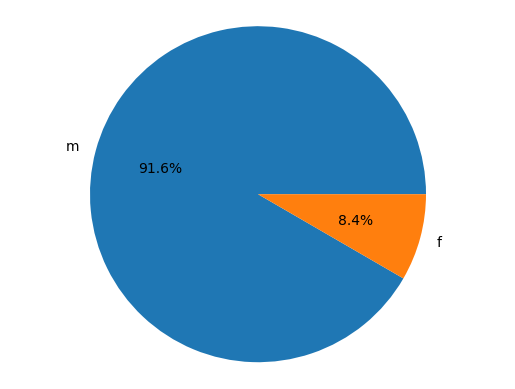

In [158]:
# visualize
gender_counts = df_predicted['gender_predicted'].value_counts()
gender_counts
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [159]:
df_predicted.to_csv('classification_results.csv',index=False)